In [1]:
from calculations_utils import *
from plot_utils import *
import datetime
import warnings
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 14})

# Check of consistency with Luis paper

In [2]:
distances = np.logspace(0,3,100)
omega = 2*np.pi*c*10**6/30
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz1 = []
Px1 = []
Py1 = []
for d in distances:
    Pz1.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px1.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py1.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [3]:
omega = 2*np.pi*c*10**6/10
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz2 = []
Px2 = []
Py2 = []
for d in distances:
    Pz2.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px2.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py2.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [4]:
omega = 2*np.pi*c*10**6/6
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz3 = []
Px3 = []
Py3 = []
for d in distances:
    Pz3.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px3.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py3.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [5]:
omega = 2*np.pi*c*10**6/1.5
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz4 = []
Px4 = []
Py4 = []
for d in distances:
    Pz4.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px4.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py4.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

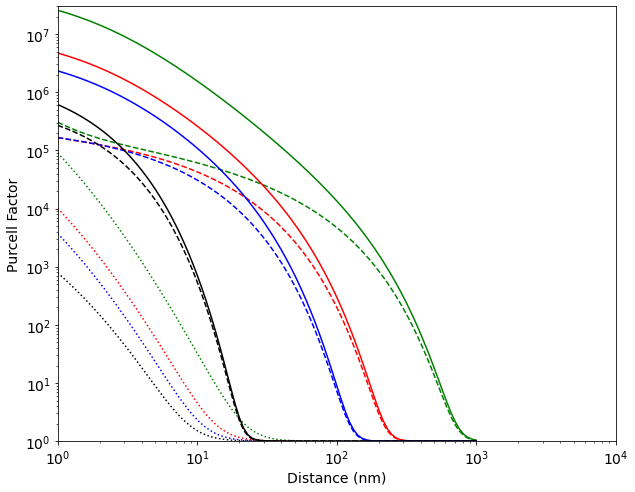

In [6]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 14})

plt.loglog(distances,Pz1,color='green',linestyle='dashed')
plt.loglog(distances,Px1,color='green',linestyle='solid')
plt.loglog(distances,Py1,color='green',linestyle='dotted')

plt.loglog(distances,Pz2,color='red',linestyle='dashed')
plt.loglog(distances,Px2,color='red',linestyle='solid')
plt.loglog(distances,Py2,color='red',linestyle='dotted')

plt.loglog(distances,Pz3,color='blue',linestyle='dashed')
plt.loglog(distances,Px3,color='blue',linestyle='solid')
plt.loglog(distances,Py3,color='blue',linestyle='dotted')

plt.loglog(distances,Pz4,color='black',linestyle='dashed')
plt.loglog(distances,Px4,color='black',linestyle='solid')
plt.loglog(distances,Py4,color='black',linestyle='dotted')

plt.xlabel('Distance (nm)')
plt.ylabel('Purcell Factor')
plt.xlim([1,10000])
plt.ylim([1,3*10**7])
plt.show()

# Check of consistency with EPL

In [2]:
omega_0 = 3.75*10**14
lambda_0 = 2*np.pi*c/omega_0
R = 0.005*lambda_0
T = 300
mu = e
mob = 10**4
epsilon = 3.9

In [3]:
lambda_0

5.023070227113977e-06

In [3]:
distances_l0 = np.arange(0.001,0.061,0.001)

Px_vac = []
Px_silica = []
for d_l0 in distances_l0:
    Px_vac.append(P('x', omega_0,mu,tau_g(mob,mu),T,R, R + d_l0*lambda_0, 1,drude=True)[0])
    Px_silica.append(P('x', omega_0,mu,tau_g(mob,mu),T,R, R + d_l0*lambda_0, 1, epsilon,drude=True)[0])

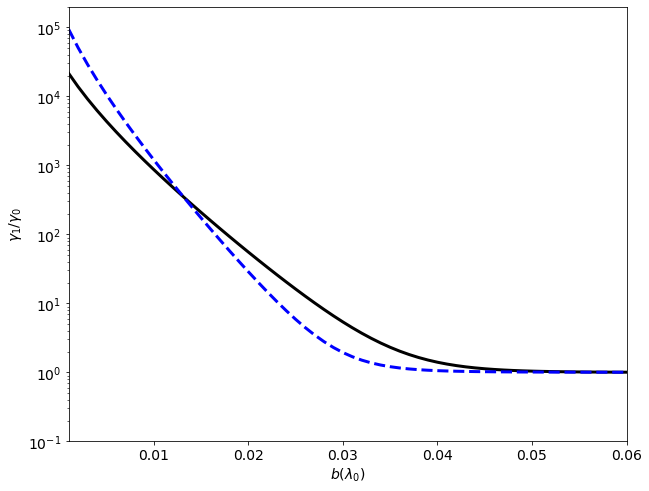

In [4]:
plt.plot(distances_l0,Px_vac,color='black',linewidth=3)
plt.plot(distances_l0,Px_silica,color='blue',linewidth=3, linestyle='dashed')

plt.xlabel('$b (\lambda_0)$')
plt.ylabel('$\gamma_1/\gamma_0$')
plt.xlim([0.001,0.06])
plt.ylim([0.1,2*100000])
plt.yscale('log')
plt.show()

In [3]:
a_l0_array = np.arange(0.0001,0.020001,0.0001)
sigma = 1j*e**2*mu/(np.pi*hbar**2*(omega_0 + 1j/tau_g(mob,mu)))
kp_vac_0 = []
kp_vac_1 = []
for a_l0 in a_l0_array:
   kp_vac_0.append(c*kp_res(0, sigma, omega_0, mu, tau_g(mob,mu), T, a_l0*lambda_0, 60, epsilon = 1)/omega_0)
   kp_vac_1.append(c*kp_res(1, sigma, omega_0, mu, tau_g(mob,mu), T, a_l0*lambda_0, 60, epsilon = 1)/omega_0)

kp_silica_0 = []
kp_silica_1 = []
for a_l0 in a_l0_array:
   kp_silica_0.append(c*kp_res(0, sigma, omega_0, mu, tau_g(mob,mu), T, a_l0*lambda_0, 60, epsilon = 3.9)/omega_0)
   kp_silica_1.append(c*kp_res(1, sigma, omega_0, mu, tau_g(mob,mu), T, a_l0*lambda_0, 60, epsilon = 3.9)/omega_0)

kp_silicon_0 = []
kp_silicon_1 = []
for a_l0 in a_l0_array:
   kp_silicon_0.append(c*kp_res(0, sigma, omega_0, mu, tau_g(mob,mu), T, a_l0*lambda_0, 60, epsilon = 11.9)/omega_0)
   kp_silicon_1.append(c*kp_res(1, sigma, omega_0, mu, tau_g(mob,mu), T, a_l0*lambda_0, 60, epsilon = 11.9)/omega_0)

c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:89: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_re = integrate.quad(F_re, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:90: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_im = integrate.quad(F_im, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:90: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
 

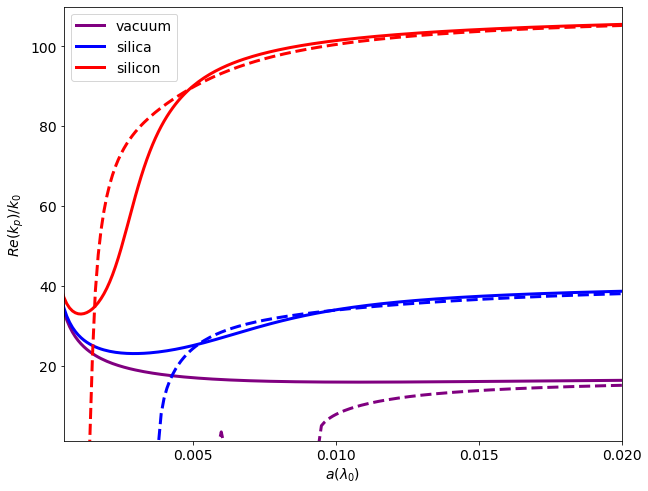

In [6]:
plt.plot(a_l0_array,np.real(kp_vac_0), color='purple', linewidth=3, label='vacuum')
plt.plot(a_l0_array,np.real(kp_silica_0), color='blue', linewidth=3, label='silica')
plt.plot(a_l0_array,np.real(kp_silicon_0), color='red', linewidth=3, label='silicon')
plt.plot(a_l0_array,np.real(kp_vac_1), color='purple', linewidth=3, linestyle='dashed')
plt.plot(a_l0_array,np.real(kp_silica_1), color='blue', linewidth=3, linestyle='dashed')
plt.plot(a_l0_array,np.real(kp_silicon_1), color='red', linewidth=3, linestyle='dashed')

plt.legend()
plt.ylim([1, 110])
plt.xticks([0,0.005,0.01,0.015,0.02])
plt.xlim([0.0005,0.02])

plt.ylabel('$Re(k_p)/k_0$')
plt.xlabel('$a (\lambda_0)$')
plt.show()

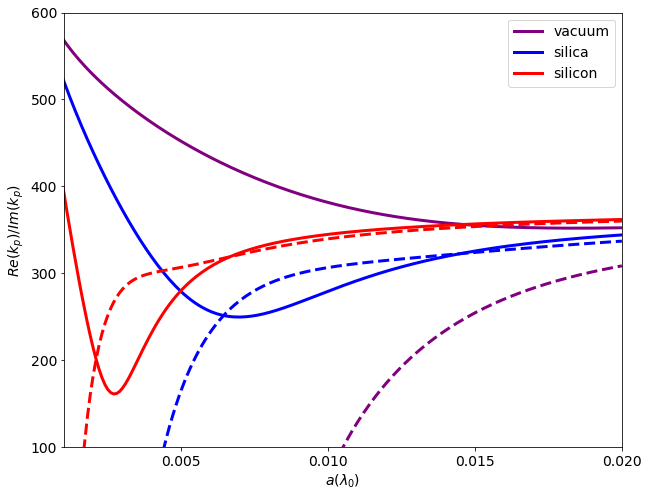

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.plot(a_l0_array,np.real(kp_vac_0)/np.imag(kp_vac_0), color='purple', linewidth=3, label='vacuum')
plt.plot(a_l0_array,np.real(kp_silica_0)/np.imag(kp_silica_0), color='blue', linewidth=3, label='silica')
plt.plot(a_l0_array,np.real(kp_silicon_0)/np.imag(kp_silicon_0), color='red', linewidth=3, label='silicon')
plt.plot(a_l0_array,np.real(kp_vac_1)/np.imag(kp_vac_1), color='purple', linewidth=3, linestyle='dashed')
plt.plot(a_l0_array,np.real(kp_silica_1)/np.imag(kp_silica_1), color='blue', linewidth=3, linestyle='dashed')
plt.plot(a_l0_array,np.real(kp_silicon_1)/np.imag(kp_silicon_1), color='red', linewidth=3, linestyle='dashed')

plt.legend()
plt.ylim([100, 600])
plt.xticks([0,0.005,0.01,0.015,0.02])
plt.xlim([0.001,0.02])

plt.ylabel('$Re(k_p)/Im(k_p)$')
plt.xlabel('$a (\lambda_0)$')
plt.show()

# Dispersion relations

## CNTs

In [59]:
mob = 10**4
R = 2*10**-9
T = 300
omega_ev_array = np.logspace(np.log10(0.01),np.log10(0.3),100)
kp_vac_025 = []
kp_vac_05 = []
kp_vac_075 = []
kp_vac_1 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar

    mu = 0.25*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_025.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = 1)/omega)

    mu = 0.5*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_05.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

    mu = 0.75*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_075.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

    mu = e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_1.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

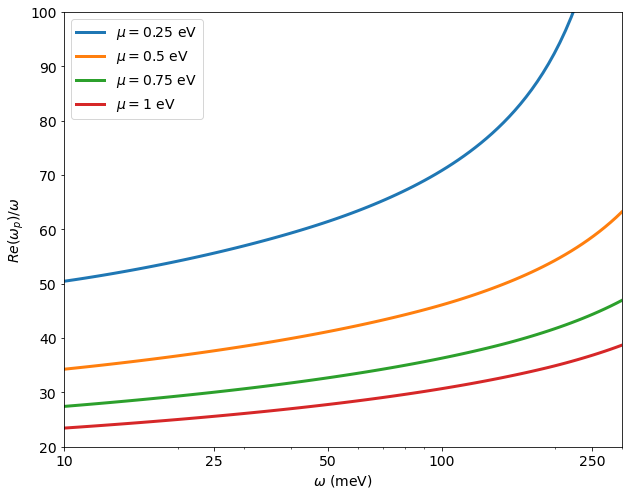

In [60]:
plt.plot(1000*omega_ev_array,np.real(kp_vac_025), linewidth=3, label='$\mu = 0.25$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_05), linewidth=3, label='$\mu = 0.5$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_075), linewidth=3, label='$\mu = 0.75$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_1), linewidth=3, label='$\mu = 1$ eV')

plt.xscale('log')
#plt.yscale('log')

plt.xlim([10,300])
plt.ylim([20,100])
plt.legend()
plt.xticks(ticks = [10,25,50,100,250], labels=[10,25,50,100,250])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/\omega$')
plt.show()

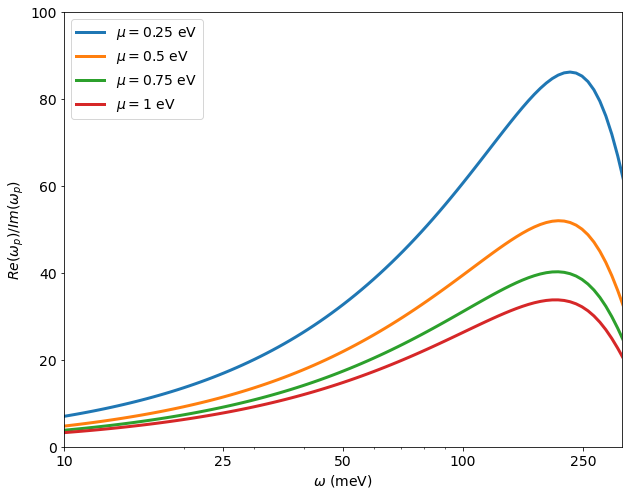

In [61]:
plt.plot(1000*omega_ev_array,np.real(kp_vac_025)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 0.25$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_05)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 0.5$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_075)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 0.75$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_1)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 1$ eV')

plt.xscale('log')
#plt.yscale('log')

plt.xlim([10,250])
plt.ylim([0,100])
plt.legend()
plt.xticks(ticks = [10,25,50,100,200], labels=[10,25,50,100,250])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/Im(\omega_p)$')
plt.show()

In [71]:
# Minimum frequency for the mode m = 1 for CNTs (R = 2nm, mu = 0.25 eV)
hbar*omega_min(1,0.25*e,2*10**-9,1)/e

0.5999926085129428

In [126]:
mob = 2500
R = 2*10**-9
T = 300
omega_ev_array = np.logspace(np.log10(0.01),np.log10(0.3),100)
kp_vac_025 = []
kp_vac_05 = []
kp_vac_075 = []
kp_vac_1 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar

    mu = 0.25*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_025.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = 1)/omega)

    mu = 0.5*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_05.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

    mu = 0.75*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_075.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

    mu = e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_1.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

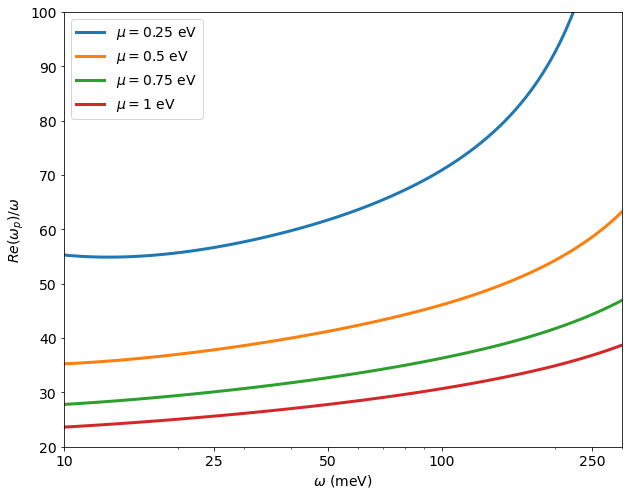

In [127]:
plt.plot(1000*omega_ev_array,np.real(kp_vac_025), linewidth=3, label='$\mu = 0.25$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_05), linewidth=3, label='$\mu = 0.5$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_075), linewidth=3, label='$\mu = 0.75$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_1), linewidth=3, label='$\mu = 1$ eV')

plt.xscale('log')
#plt.yscale('log')

plt.xlim([10,300])
plt.ylim([20,100])
plt.legend()
plt.xticks(ticks = [10,25,50,100,250], labels=[10,25,50,100,250])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/\omega$')
plt.show()

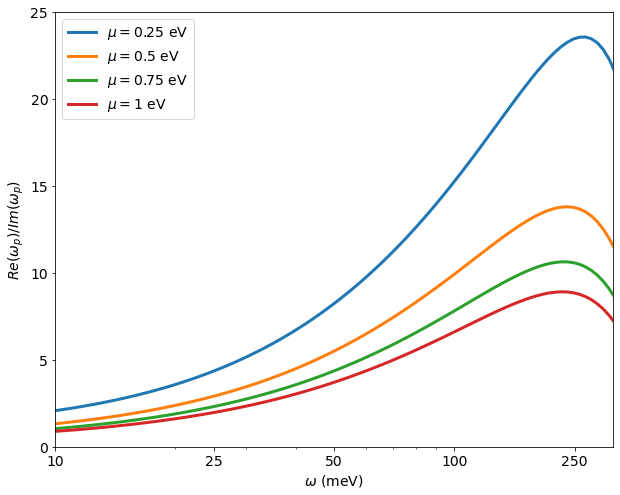

In [130]:
plt.plot(1000*omega_ev_array,np.real(kp_vac_025)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 0.25$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_05)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 0.5$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_075)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 0.75$ eV')
plt.plot(1000*omega_ev_array,np.real(kp_vac_1)/np.imag(kp_vac_025), linewidth=3, label='$\mu = 1$ eV')

plt.xscale('log')
#plt.yscale('log')

plt.xlim([10,250])
plt.ylim([0,25])
plt.legend()
plt.xticks(ticks = [10,25,50,100,200], labels=[10,25,50,100,250])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/Im(\omega_p)$')
plt.show()

## Graphene coated wires

### Silicon

In [135]:
hbar*omega_min(3,1*e,15*10**-9,11.68)/e

0.30141250239190304

In [139]:
mob = 10**4
mu = e
T = 300
epsilon_sil = 11.68
omega_ev_array = np.linspace(0.01,0.3,100)
kp_sil_10_0 = []
kp_sil_10_1 = []
kp_sil_15_0 = []
kp_sil_15_1 = []
kp_sil_15_2 = []
kp_sil_20_0 = []
kp_sil_20_1 = []
kp_sil_20_2 = []
kp_sil_20_3 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)

    R = 10*10**-9
    kp_sil_10_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_10_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

    R = 15*10**-9
    kp_sil_15_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_15_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_15_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

    R = 20*10**-9
    kp_sil_20_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_20_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_20_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_20_3.append(c*kp_res(3, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:82: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_re = integrate.quad(F_re, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:83: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_im = integrate.quad(F_im, 0, 2*np.pi)


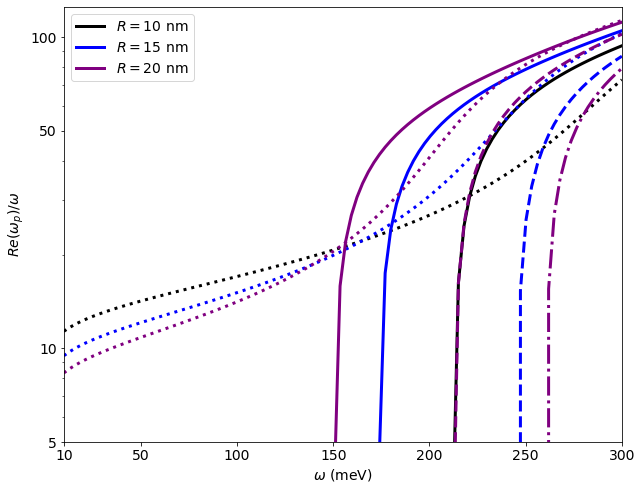

In [151]:
plt.plot(1000*omega_ev_array,np.real(kp_sil_10_0), color='black', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_sil_10_1), color='black', linewidth=3, linestyle='solid', label='$R = 10$ nm')

plt.plot(1000*omega_ev_array,np.real(kp_sil_15_0), color='blue', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_sil_15_1), color='blue', linewidth=3, linestyle='solid', label='$R = 15$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_15_2), color='blue', linewidth=3, linestyle='dashed')

plt.plot(1000*omega_ev_array,np.real(kp_sil_20_0), color='purple', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_sil_20_1), color='purple', linewidth=3, linestyle='solid', label='$R = 20$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_20_2), color='purple', linewidth=3, linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_sil_20_3), color='purple', linewidth=3, linestyle='dashdot')


#plt.xscale('log')
plt.yscale('log')

plt.xlim([10,300])
plt.ylim([5,125])
plt.legend()
plt.xticks([10,50,100,150,200,250,300])
plt.yticks(ticks = [5,10,50,100], labels = [5,10,50,100])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/\omega$')
plt.show()

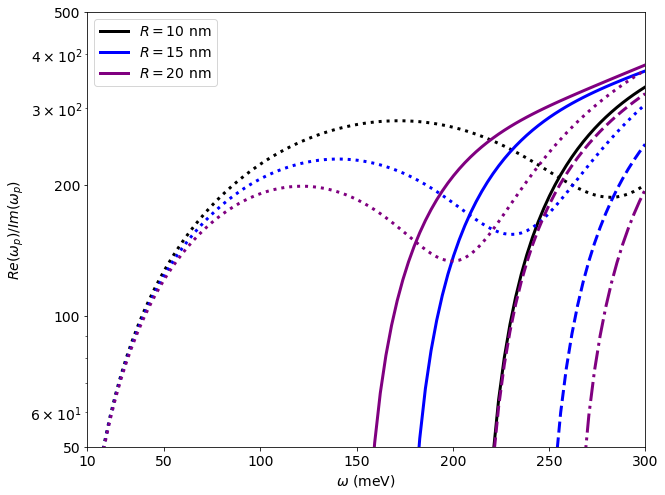

In [157]:
warnings.filterwarnings('ignore')
plt.plot(1000*omega_ev_array,np.real(kp_sil_10_0)/np.imag(kp_sil_10_0), color='black', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_sil_10_1)/np.imag(kp_sil_10_1), color='black', linewidth=3, linestyle='solid', label='$R = 10$ nm')

plt.plot(1000*omega_ev_array,np.real(kp_sil_15_0)/np.imag(kp_sil_15_0), color='blue', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_sil_15_1)/np.imag(kp_sil_15_1), color='blue', linewidth=3, linestyle='solid', label='$R = 15$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_15_2)/np.imag(kp_sil_15_2), color='blue', linewidth=3, linestyle='dashed')

plt.plot(1000*omega_ev_array,np.real(kp_sil_20_0)/np.imag(kp_sil_20_0), color='purple', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_sil_20_1)/np.imag(kp_sil_20_1), color='purple', linewidth=3, linestyle='solid', label='$R = 20$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_20_2)/np.imag(kp_sil_20_2), color='purple', linewidth=3, linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_sil_20_3)/np.imag(kp_sil_20_3), color='purple', linewidth=3, linestyle='dashdot')


#plt.xscale('log')
plt.yscale('log')

plt.xlim([10,300])
plt.ylim([50,500])
plt.legend()
plt.xticks([10,50,100,150,200,250,300])
plt.yticks(ticks = [50,100,200,500], labels = [50,100,200,500])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/Im(\omega_p)$')
plt.show()

### MgF2

In [215]:
hbar*omega_min(3,0.5*e,50*10**-9,1.4443)/e

0.26588220085690606

In [217]:
mob = 10**4
mu = 0.5*e
T = 300
epsilon_f = 1.4443
omega_ev_array = np.linspace(0.01,0.3,100)
kp_f_20_0 = []
kp_f_20_1 = []
kp_f_30_0 = []
kp_f_30_1 = []
kp_f_30_2 = []
kp_f_50_0 = []
kp_f_50_1 = []
kp_f_50_2 = []
kp_f_50_3 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)

    R = 20*10**-9
    kp_f_20_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_f)/omega)
    kp_f_20_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_f)/omega)

    R = 30*10**-9
    kp_f_30_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_f)/omega)
    kp_f_30_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_f)/omega)
    kp_f_30_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_f)/omega)

    R = 50*10**-9
    kp_f_50_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_f)/omega)
    kp_f_50_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_f)/omega)
    kp_f_50_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_f)/omega)
    kp_f_50_3.append(c*kp_res(3, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_f)/omega)

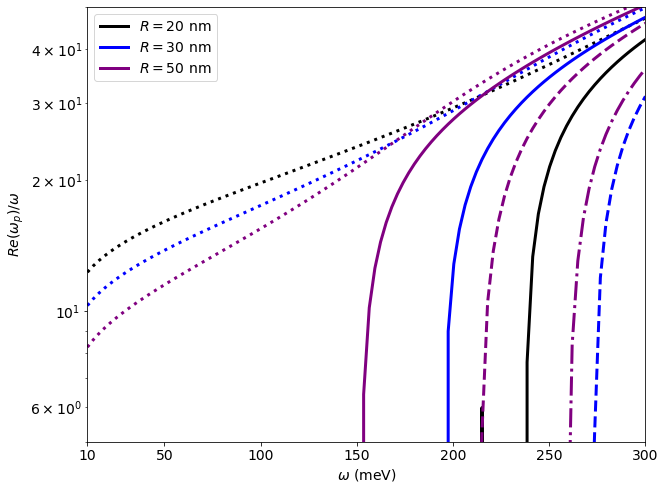

In [234]:
plt.plot(1000*omega_ev_array,np.real(kp_f_20_0), color='black', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_f_20_1), color='black', linewidth=3, linestyle='solid', label='$R = 20$ nm')

plt.plot(1000*omega_ev_array,np.real(kp_f_30_0), color='blue', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_f_30_1), color='blue', linewidth=3, linestyle='solid', label='$R = 30$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_f_30_2), color='blue', linewidth=3, linestyle='dashed')

plt.plot(1000*omega_ev_array,np.real(kp_f_50_0), color='purple', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_f_50_1), color='purple', linewidth=3, linestyle='solid', label='$R = 50$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_f_50_2), color='purple', linewidth=3, linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_f_50_3), color='purple', linewidth=3, linestyle='dashdot')

plt.yscale('log')
#plt.xscale('log')

plt.xlim([10,300])
plt.ylim([5,50])
plt.legend()
plt.xticks([10,50,100,150,200,250,300])

plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/\omega$')
#plt.yticks([5,10, 50], [5,10,50])
plt.show()

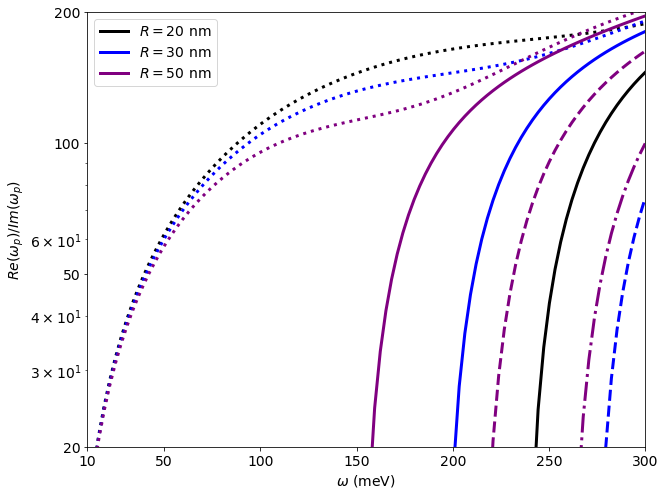

In [241]:
plt.plot(1000*omega_ev_array,np.real(kp_f_20_0)/np.imag(kp_f_20_0), color='black', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_f_20_1)/np.imag(kp_f_20_1), color='black', linewidth=3, linestyle='solid', label='$R = 20$ nm')

plt.plot(1000*omega_ev_array,np.real(kp_f_30_0)/np.imag(kp_f_30_0), color='blue', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_f_30_1)/np.imag(kp_f_30_1), color='blue', linewidth=3, linestyle='solid', label='$R = 30$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_f_30_2)/np.imag(kp_f_30_2), color='blue', linewidth=3, linestyle='dashed')

plt.plot(1000*omega_ev_array,np.real(kp_f_50_0)/np.imag(kp_f_50_0), color='purple', linewidth=3, linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_f_50_1)/np.imag(kp_f_50_1), color='purple', linewidth=3, linestyle='solid', label='$R = 50$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_f_50_2)/np.imag(kp_f_50_2), color='purple', linewidth=3, linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_f_50_3)/np.imag(kp_f_50_3), color='purple', linewidth=3, linestyle='dashdot')


#plt.xscale('log')
plt.yscale('log')

plt.xlim([10,300])
plt.ylim([20,200])
plt.legend()
plt.xticks([10,50,100,150,200,250,300])
plt.yticks(ticks = [20,50,100,200], labels = [20,50,100,200])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(\omega_p)/Im(\omega_p)$')
plt.show()

# TPSE spectral densities (CNTs)

In [8]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu_ev_array = np.array([0.25,0.5,0.75,1])
T = 300
R = 2*10**(-9)
d = R + 10*10**(-9)
m_max = 5

gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for mu_ev in mu_ev_array:
    gamma_mu = []
    for step in omega_steps:
        gamma_mu.append(gamma(omega_0, omega_0*step, mu_ev*e, tau_g(10**4,mu_ev*e), T, R, d, m_max))
    gammas.append(gamma_mu)

c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:90: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)


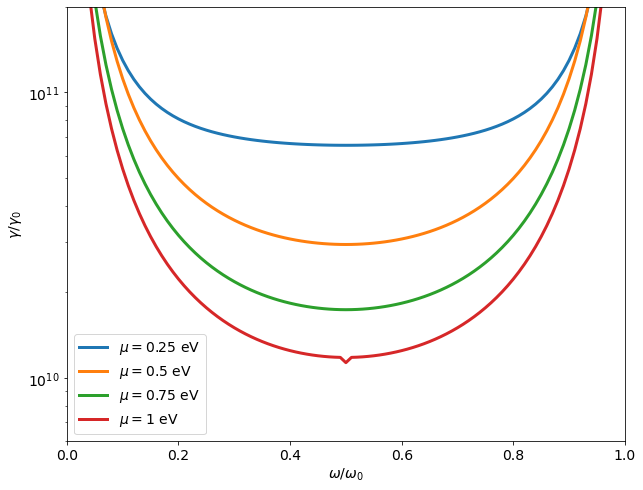

In [33]:
plt.plot(np.linspace(0.01,0.99,99),gammas[0][:-1] + gammas[0][::-1], label='$\mu = 0.25$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[1][:-1] + gammas[1][::-1], label='$\mu = 0.5$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[2][:-1] + gammas[2][::-1], label='$\mu = 0.75$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[3][:-1] + gammas[3][::-1], label='$\mu = 1$ eV', linewidth=3)

plt.xlim([0,1])
plt.ylim([6*10**9,2*10**11])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

# TPSE spectral densities (Graphene coated wire)

## Silicon

In [272]:
hbar*omega_min(6,1*e,30*10**-9,11.68)/e

0.30141250239190304

In [248]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu = e
T = 300
epsilon = 11.68
R1 = 10*10**(-9)
R2 = e**2*mu/((1 + epsilon)*np.pi*epsilon_0*(hbar*omega_0/2)**2)
R3 = 30*10**-9

In [250]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mob = 10**4
mu = e
T = 300
epsilon = 11.68
R1 = 10*10**(-9)
R2 = e**2*mu/((1 + epsilon)*np.pi*epsilon_0*(hbar*omega_0/2)**2)
R3 = 30*10**-9
d = 10*10**-9
m_max = 10

gamma_1 = []
gamma_2 = []
gamma_3 = []
omega_steps = np.linspace(0.01,0.5,50)

for step in omega_steps:
    print('step:', step)
    gamma_1.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R1, d + R1, m_max, epsilon=epsilon))
    gamma_2.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R2, d + R2, m_max, epsilon=epsilon))
    gamma_3.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R3, d + R3, m_max, epsilon=epsilon))

step: 0.01
step: 0.02
step: 0.03
step: 0.04
step: 0.05
step: 0.060000000000000005
step: 0.06999999999999999
step: 0.08
step: 0.09
step: 0.09999999999999999
step: 0.11
step: 0.12
step: 0.13
step: 0.14
step: 0.15000000000000002
step: 0.16
step: 0.17
step: 0.18000000000000002
step: 0.19
step: 0.2
step: 0.21000000000000002
step: 0.22
step: 0.23
step: 0.24000000000000002
step: 0.25
step: 0.26
step: 0.27
step: 0.28
step: 0.29000000000000004
step: 0.3
step: 0.31
step: 0.32
step: 0.33
step: 0.34
step: 0.35000000000000003
step: 0.36000000000000004
step: 0.37
step: 0.38
step: 0.39
step: 0.4
step: 0.41000000000000003
step: 0.42000000000000004
step: 0.43
step: 0.44
step: 0.45
step: 0.46
step: 0.47000000000000003
step: 0.48000000000000004
step: 0.49
step: 0.5


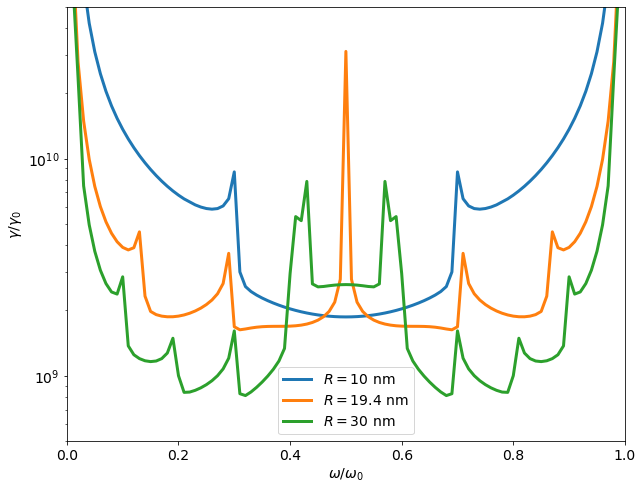

In [269]:
# Correcting numerical issue
gamma_1c = np.array(gamma_1)
idx = np.argwhere(gamma_1c < 10**9)
gamma_1c[idx] = 10**((np.log10(gamma_1c[idx + 1]) + np.log10(gamma_1c[idx - 1]))/2)
gamma_1c = list(gamma_1c)

plt.plot(np.linspace(0.01,0.99,99),gamma_1c[:-1] + gamma_1c[::-1], label='$R = 10$ nm', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99), gamma_2[:-1] + gamma_2[::-1], label='$R = 19.4$ nm', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gamma_3[:-1] + gamma_3[::-1], label='$R = 30$ nm', linewidth=3)

plt.xlim([0,1])
plt.ylim([5*10**8,5*10**10])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

In [275]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mob = 2500
mu = e
T = 300
epsilon = 11.68
R1 = 10*10**(-9)
R2 = e**2*mu/((1 + epsilon)*np.pi*epsilon_0*(hbar*omega_0/2)**2)
R3 = 30*10**-9
d = 10*10**-9
m_max = 10

gamma_1 = []
gamma_2 = []
gamma_3 = []
omega_steps = np.linspace(0.01,0.5,50)

for step in omega_steps:
    print('step:', step)
    gamma_1.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R1, d + R1, m_max, epsilon=epsilon))
    gamma_2.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R2, d + R2, m_max, epsilon=epsilon))
    gamma_3.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R3, d + R3, m_max, epsilon=epsilon))

step: 0.01
step: 0.02
step: 0.03
step: 0.04
step: 0.05
step: 0.060000000000000005
step: 0.06999999999999999
step: 0.08
step: 0.09
step: 0.09999999999999999
step: 0.11
step: 0.12
step: 0.13
step: 0.14
step: 0.15000000000000002
step: 0.16
step: 0.17
step: 0.18000000000000002
step: 0.19
step: 0.2
step: 0.21000000000000002
step: 0.22
step: 0.23
step: 0.24000000000000002
step: 0.25
step: 0.26
step: 0.27
step: 0.28
step: 0.29000000000000004
step: 0.3
step: 0.31
step: 0.32
step: 0.33
step: 0.34
step: 0.35000000000000003
step: 0.36000000000000004
step: 0.37
step: 0.38
step: 0.39
step: 0.4
step: 0.41000000000000003
step: 0.42000000000000004
step: 0.43
step: 0.44
step: 0.45
step: 0.46
step: 0.47000000000000003
step: 0.48000000000000004
step: 0.49
step: 0.5


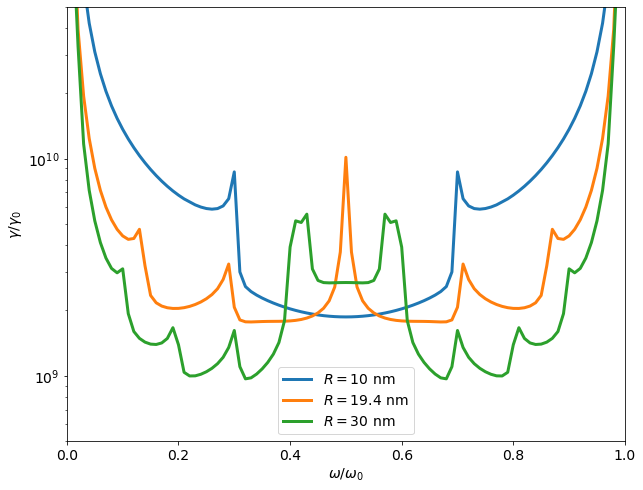

In [276]:
plt.plot(np.linspace(0.01,0.99,99),gamma_1c[:-1] + gamma_1c[::-1], label='$R = 10$ nm', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99), gamma_2[:-1] + gamma_2[::-1], label='$R = 19.4$ nm', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gamma_3[:-1] + gamma_3[::-1], label='$R = 30$ nm', linewidth=3)

plt.xlim([0,1])
plt.ylim([5*10**8,5*10**10])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

## MgF2

In [279]:
hbar*omega_min(9,0.5*e,100*10**-9,1.4443)/e

0.32563786189380406

In [280]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mob = 10**4
mu = 0.5*e
T = 300
epsilon = 1.4443
R1 = 20*10**(-9)
R2 = e**2*mu/((1 + epsilon)*np.pi*epsilon_0*(hbar*omega_0/2)**2)
R3 = 100*10**-9
d = 10*10**-9
m_max = 10

gamma_1 = []
gamma_2 = []
gamma_3 = []
omega_steps = np.linspace(0.01,0.5,50)

for step in omega_steps:
    print('step:', step)
    gamma_1.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R1, d + R1, m_max, epsilon=epsilon))
    gamma_2.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R2, d + R2, m_max, epsilon=epsilon))
    gamma_3.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R3, d + R3, m_max, epsilon=epsilon))

step: 0.01
step: 0.02
step: 0.03
step: 0.04
step: 0.05
step: 0.060000000000000005
step: 0.06999999999999999
step: 0.08
step: 0.09
step: 0.09999999999999999
step: 0.11
step: 0.12
step: 0.13
step: 0.14
step: 0.15000000000000002
step: 0.16
step: 0.17
step: 0.18000000000000002
step: 0.19
step: 0.2
step: 0.21000000000000002
step: 0.22
step: 0.23
step: 0.24000000000000002
step: 0.25
step: 0.26
step: 0.27
step: 0.28
step: 0.29000000000000004
step: 0.3
step: 0.31
step: 0.32
step: 0.33
step: 0.34
step: 0.35000000000000003
step: 0.36000000000000004
step: 0.37
step: 0.38
step: 0.39
step: 0.4
step: 0.41000000000000003
step: 0.42000000000000004
step: 0.43
step: 0.44
step: 0.45
step: 0.46
step: 0.47000000000000003
step: 0.48000000000000004
step: 0.49
step: 0.5


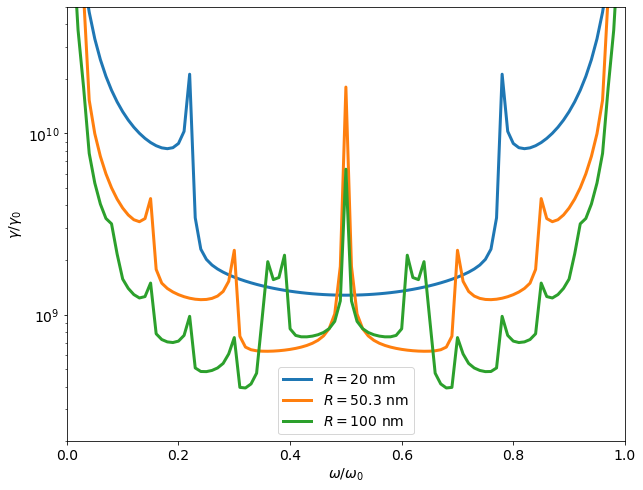

In [283]:
plt.plot(np.linspace(0.01,0.99,99),gamma_1[:-1] + gamma_1[::-1], label='$R = 20$ nm', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99), gamma_2[:-1] + gamma_2[::-1], label='$R = 50.3$ nm', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gamma_3[:-1] + gamma_3[::-1], label='$R = 100$ nm', linewidth=3)

plt.xlim([0,1])
plt.ylim([2*10**8,5*10**10])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

## Multiple epsilons

In [299]:
hbar*omega_min(3,0.5*e,25*10**-9,2)/e

0.3394070737130458

In [2]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mob = 10**4
mu = 0.5*e
T = 300
R = 25*10**(-9)
epsilon1 = 2
epsilon2 = e**2*mu/(R*np.pi*epsilon_0*(hbar*omega_0/2)**2) - 1
epsilon3 = 2*e**2*mu/(R*np.pi*epsilon_0*(hbar*omega_0/2)**2) - 1
epsilon4 = 12
d = 10*10**-9
m_max = 12

gamma_1 = []
gamma_2 = []
gamma_3 = []
gamma_4 = []
omega_steps = np.linspace(0.01,0.5,50)

for step in omega_steps:
    print('step:', step)
    gamma_1.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon1))
    gamma_2.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon2))
    gamma_3.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon3))
    gamma_4.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon4))

step: 0.01
step: 0.02
step: 0.03
step: 0.04
step: 0.05
step: 0.060000000000000005
step: 0.06999999999999999
step: 0.08
step: 0.09
step: 0.09999999999999999
step: 0.11
step: 0.12
step: 0.13
step: 0.14
step: 0.15000000000000002
step: 0.16
step: 0.17
step: 0.18000000000000002
step: 0.19
step: 0.2
step: 0.21000000000000002
step: 0.22
step: 0.23
step: 0.24000000000000002
step: 0.25
step: 0.26
step: 0.27
step: 0.28
step: 0.29000000000000004
step: 0.3
step: 0.31
step: 0.32
step: 0.33
step: 0.34
step: 0.35000000000000003
step: 0.36000000000000004
step: 0.37
step: 0.38
step: 0.39
step: 0.4
step: 0.41000000000000003
step: 0.42000000000000004
step: 0.43
step: 0.44
step: 0.45
step: 0.46
step: 0.47000000000000003
step: 0.48000000000000004
step: 0.49
step: 0.5


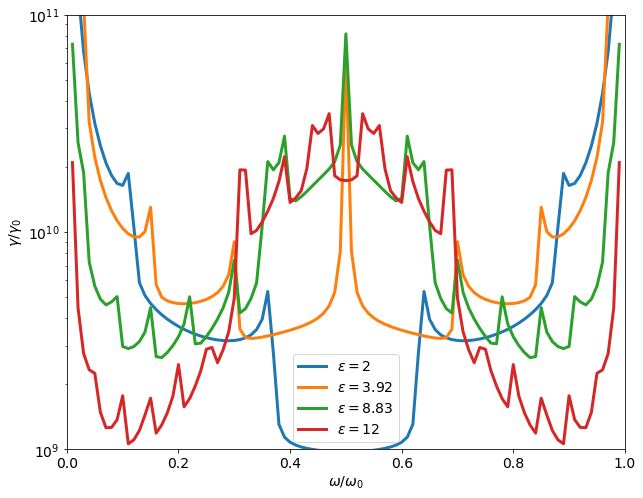

In [6]:
plt.plot(np.linspace(0.01,0.99,99),gamma_1[:-1] + gamma_1[::-1], label='$\epsilon = 2$', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99), gamma_2[:-1] + gamma_2[::-1], label='$\epsilon = 3.92$', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gamma_3[:-1] + gamma_3[::-1], label='$\epsilon = 8.83$', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gamma_4[:-1] + gamma_4[::-1], label='$\epsilon = 12$', linewidth=3)

plt.xlim([0,1])
plt.ylim([1*10**9,1*10**11])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

## Contour plot

In [9]:
hbar*omega_min(11,e,50*10**-9,11.68)/e

0.3161240994577349

In [10]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mob = 10**4
mu = e
T = 300
epsilon = 11.68
R_nm_array = np.arange(10,50.01,0.5)
distance_nm = 10
m_max = 12

gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for R_nm in R_nm_array:
    print('R (nm):', R_nm)
    gamma_R = []
    for step in omega_steps:
        gamma_R.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R_nm*10**(-9), (distance_nm + R_nm)*10**(-9), m_max, epsilon = epsilon))
    gammas.append(gamma_R)
    np.save('contour_plot_data.npy',np.array(gammas))

R (nm): 10.0
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:162: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral = integrate.quad(integrand, 0, 10/R)
R (nm): 10.5
R (nm): 11.0
R (nm): 11.5
R (nm): 12.0
R (nm): 12.5
R (nm): 13.0
R (nm): 13.5
R (nm): 14.0
R (nm): 14.5
R (nm): 15.0
R (nm): 15.5
R (nm): 16.0
R (nm): 16.5
R (nm): 17.0
R (nm): 17.5
R (nm): 18.0
R (nm): 18.5
R (nm): 19.0
R (nm): 19.5
R (nm): 20.0
R (nm): 20.5
R (nm): 21.0
R (nm): 21.5
R (nm): 22.0
R (nm): 22.5
R (nm): 23.0
R (nm): 23.5
R (nm): 24.0
R (nm): 24.5
R (nm): 25.0
R (nm): 25.5
R (nm): 26.0
R (nm): 26.5
R (nm): 27.0
R (nm): 27.5
R (nm): 28.0
R (nm): 28.5
R (nm): 29.0
R (nm): 29.5
R (nm): 30.0
R (nm): 30.5
R (nm): 31.0
R (nm): 31.5
R (nm): 32.0
R (nm): 32.5
R

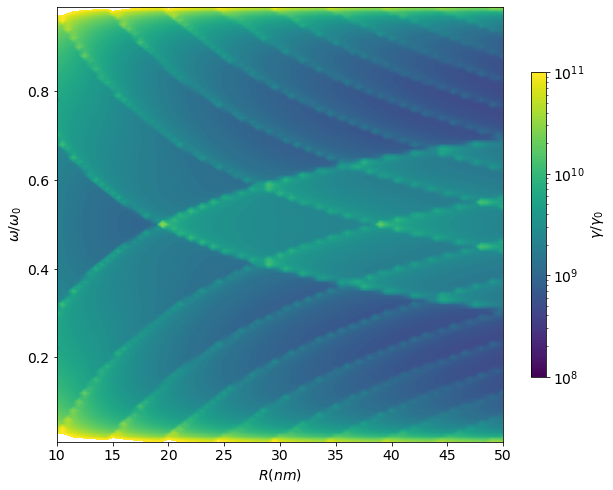

In [12]:
from matplotlib import ticker, cm

omega_steps = np.linspace(0.01,0.99,99)
R_nm_array = np.arange(10,50.1,0.5)
gammas_half = np.load('contour_plot_data.npy')

gammas = []
for i in range(len(gammas_half)):
    gammas.append(list(gammas_half[i][:-1]) + list(gammas_half[i][::-1]))
gammas = np.transpose(np.array(gammas))

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(10, 8),nrows=1, ncols=1)

c = ax.contourf(R_nm_array, omega_steps, gammas, np.logspace(8, 11,100), locator=ticker.LogLocator())
b0 = fig.colorbar(c,ax=ax,ticks=[10**i for i in range(6,13,1)], shrink=0.7, label='$\gamma/\gamma_0$')
ax.set_xlabel("$R (nm)$")
ax.set_ylabel("$\omega/\omega_0$")
ax.set_xlim(right=50)

plt.show()

# TPSE rate an quantum efficiencies (CNTs)

In [2]:
T = 300
R = 2*10**(-9)
mu_ev_array = np.array([0.25,0.5,0.75,1])
mob = 10**4
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar

ne = 5
ng = 4
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

distances_nm = np.arange(1,102,5)
Gammas = []
for mu_ev in mu_ev_array:
    print('\nmu (ev):', mu_ev)
    Gamma_mu = []
    for distance_nm in distances_nm:
        print('d (nm):', distance_nm)
        Gamma_mu.append(Gamma(d_matrix, ne, ng, mu_ev*e, tau_g(mob,mu_ev*e), T, R, R + distance_nm*10**(-9), m_max, MCut, omegaCut))
    Gammas.append(Gamma_mu)

np.save('Gamma_CNT.npy',np.array(Gammas))


mu (ev): 0.25
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 0.5
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 0.75
d (nm): 1
d (nm): 6
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)
d (nm): 11
d (nm): 16
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

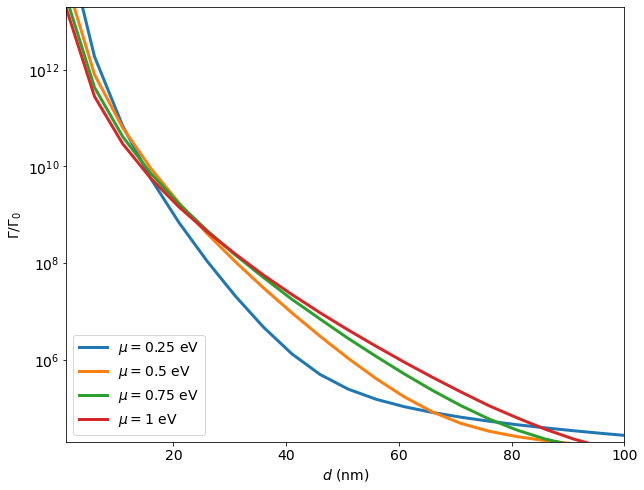

In [15]:
Gammas = np.load('Gamma_CNT.npy')
#G0 = Gamma_0(d_matrix, 5, 4, 10, omegaCut)

plt.plot(np.arange(1,102,5),Gammas[0]/G0, label='$\mu = 0.25$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),Gammas[1]/G0, label='$\mu = 0.5$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),Gammas[2]/G0, label='$\mu = 0.75$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),Gammas[3]/G0, label='$\mu = 1$ eV', linewidth=3)


plt.xlim([1,100])
plt.ylim([2*10**4,2*10**13])
plt.legend(loc='lower left')
plt.xlabel('$d$ (nm)')
plt.ylabel('$\Gamma/\Gamma_0$')
plt.yscale('log')

In [21]:
T = 300
R = 2*10**(-9)
mu_ev_array = np.array([0.25,0.5,0.75,1])
mob = 10**4
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar

ne = 5
ng = 4
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

distances_nm = np.arange(1,102,5)
Gamma054 = Gamma01ph(5,4)
Gamma053 = Gamma01ph(5,3)
Gamma052 = Gamma01ph(5,2)
Gammas = []
for mu_ev in mu_ev_array:
    print('\nmu (ev):', mu_ev)
    Gamma_mu = []
    for distance_nm in distances_nm:
        print('d (nm):', distance_nm)
        Gamma54 = Gamma054*P_iso(domega(5,4), mu_ev*e, tau_g(mob,mu_ev*e), T, R, R + distance_nm*10**(-9), m_max)
        Gamma53 = Gamma053*P_iso(domega(5,3), mu_ev*e, tau_g(mob,mu_ev*e), T, R, R + distance_nm*10**(-9), m_max)
        Gamma52 = Gamma052*P_iso(domega(5,2), mu_ev*e, tau_g(mob,mu_ev*e), T, R, R + distance_nm*10**(-9), m_max)
        Gamma_mu.append(Gamma54 + Gamma53 + Gamma52)
    Gammas.append(Gamma_mu)

np.save('Gamma_CNT_1ph.npy',np.array(Gammas))


mu (ev): 0.25
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 0.5
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 0.75
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 1.0
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101


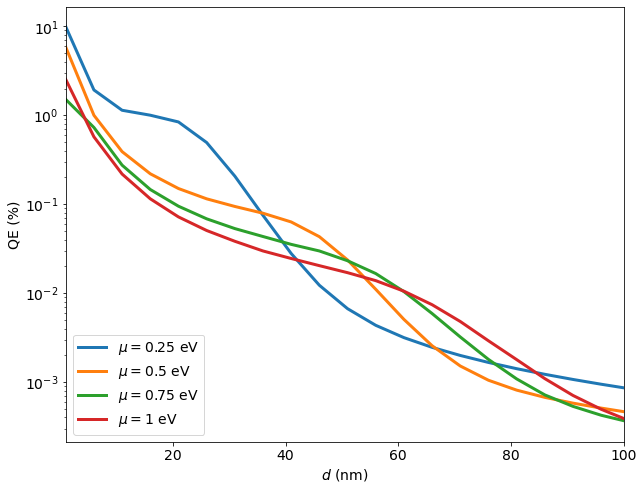

In [25]:
Gammas = np.load('Gamma_CNT.npy')
Gammas1ph = np.load('Gamma_CNT_1ph.npy')
QEs = 100*Gammas/(Gammas + Gammas1ph)

plt.plot(np.arange(1,102,5),QEs[0], label='$\mu = 0.25$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),QEs[1], label='$\mu = 0.5$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),QEs[2], label='$\mu = 0.75$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),QEs[3], label='$\mu = 1$ eV', linewidth=3)


plt.xlim([1,100])
#plt.ylim([2*10**4,2*10**13])
plt.legend(loc='lower left')
plt.xlabel('$d$ (nm)')
plt.ylabel('QE (%)')
plt.yscale('log')
plt.show()

# TPSE rate and quantum efficiencies (Graphene coated wire)

In [6]:
T = 300
R = 19.4*10**(-9)
mob = 10**4
mu = e
distance_nm = 10
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar

ne = 5
ng = 4
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

before = datetime.datetime.now()
g = Gamma(d_matrix, ne, ng, mu, tau_g(mob,mu), T, R, R + distance_nm*10**(-9), m_max, MCut, omegaCut, epsilon=11.68)
after = datetime.datetime.now()

print(after - before)

0:06:16.521211


In [7]:
g/Gamma_0(d_matrix, 5, 4, 10, omegaCut)

3908459984.6373034

## As a function of epsilon

In [ ]:
hbar*omega_min(3,0.5*e,25*10**-9,2)/e

In [9]:
mob = 10**4
mu = 0.5*e
T = 300
R = 25*10**(-9)
distance = 10*10**-9
m_max = 12
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar
epsilon2 = e**2*mu/(R*np.pi*epsilon_0*(hbar*domega(ne,ng)/2)**2) - 1

In [13]:
len(np.arange(3,5.01,0.1))

21

In [15]:
mob = 10**4
mu = 0.5*e
T = 300
R = 25*10**(-9)
distance = 10*10**-9
m_max = 12
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar

ne = 5
ng = 4
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

epsilon_array = np.arange(3,5.01,0.1)
Gammas = []
for epsilon in epsilon_array:
    print('epsilon:', epsilon)
    Gammas.append(Gamma(d_matrix, ne, ng, mu, tau_g(mob,mu), T, R, R + distance, m_max, MCut, omegaCut, epsilon=epsilon))

np.save('Gamma_gcw_epsilon.npy',np.array(Gammas))

epsilon: 3.0
epsilon: 3.1
epsilon: 3.2
epsilon: 3.3000000000000003
epsilon: 3.4000000000000004
epsilon: 3.5000000000000004
epsilon: 3.6000000000000005
epsilon: 3.7000000000000006
epsilon: 3.8000000000000007
epsilon: 3.900000000000001
epsilon: 4.000000000000001
epsilon: 4.100000000000001
epsilon: 4.200000000000001
epsilon: 4.300000000000001
epsilon: 4.400000000000001
epsilon: 4.500000000000002
epsilon: 4.600000000000001
epsilon: 4.700000000000001
epsilon: 4.800000000000002
epsilon: 4.900000000000002
epsilon: 5.000000000000002


In [24]:
hbar*omega_min(3,0.5*e,25*10**-9,3.5)/e

0.27712471522938664

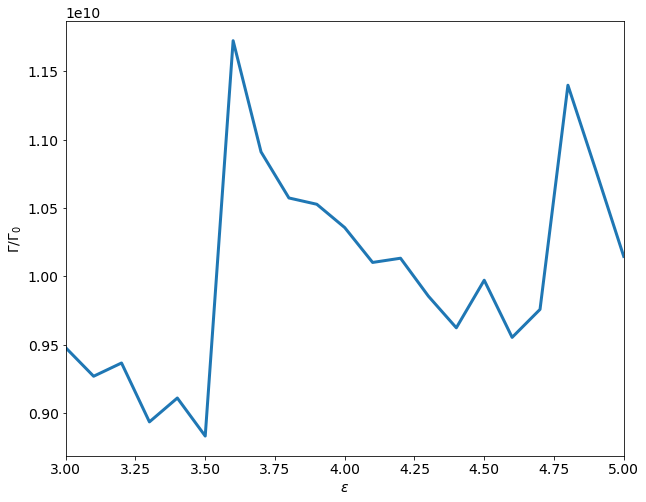

In [18]:
Gammas = np.load('Gamma_gcw_epsilon.npy')
G0 = Gamma_0(d_matrix, 5, 4, 10, omegaCut)

plt.plot(np.arange(3,5.01,0.1),Gammas/G0, linewidth=3)



plt.xlim([3,5])
#plt.ylim([2*10**4,2*10**13])
plt.xlabel('$\epsilon$')
plt.ylabel('$\Gamma/\Gamma_0$')
#plt.yscale('log')
plt.show()

## As a function of R

## As a function of distance

In [18]:
ne = 5
ng = 4
mob = 10**4
mu = e
T = 300
epsilon = 11.68
R = e**2*mu/((1 + epsilon)*np.pi*epsilon_0*(hbar*domega(ne,ng)/2)**2)
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar

d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

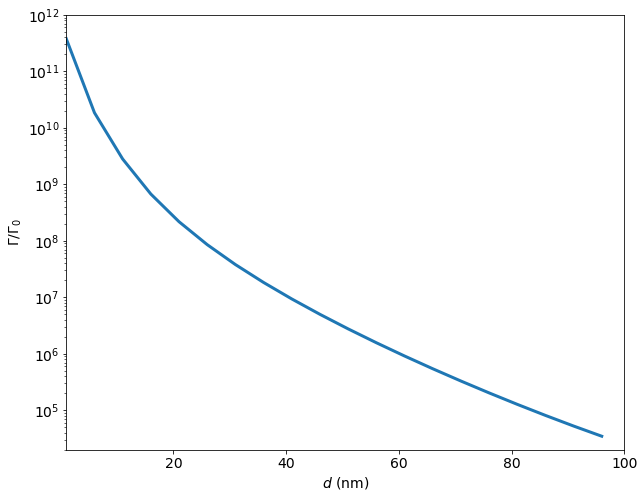

In [20]:
Gammas = np.load('Gamma_gcw_distances.npy')
G0 = Gamma_0(d_matrix, ne, ng, 10, omegaCut)

plt.plot(np.arange(1,101,5),Gammas/G0, linewidth=3)


plt.xlim([1,100])
plt.ylim([2*10**4,10**12])
plt.xlabel('$d$ (nm)')
plt.ylabel('$\Gamma/\Gamma_0$')
plt.yscale('log')
plt.show()